# Mobile Specification Analysis: Unveiling the Key Drivers of Price and Performance
CS 3072 - 1: Data Science Project Code

Leen Sharab - Lujain Almarri - Mawaddah Alagha

# Dataset Overview

In [ ]:
# Loading the dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mobiles = pd.read_csv('mobiles.csv')
mobiles.head()

,mobile_name,price,rating,specs_score,connectivity,processor,storage,battery,display,camera,extra_storage,os
0,OPPO Reno 11,"₹29,990",4.70,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio
1,Poco X6 Pro 5G,"₹19,999",4.50,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8300 Ultra, Octa Core, 3.35 GHz Proc...","12 GB RAM, 256 GB inbuilt",5500 mAh Battery with 90W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v14,No FM Radio
2,Xiaomi Redmi Note 13 Pro Plus,"₹31,999",4.35,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 7200 Ultra, Octa Core, 2.8 GHz Proce...","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
3,OPPO Reno 11 Pro,"₹40,990",4.75,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8200, Octa Core, 3.1 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 80W Fast Charging,"6.74 inches, 1240 x 2772 px, 120 Hz Display wi...",50 MP + 32 MP + 8 MP Triple Rear & 32 MP Front...,Android v14,No FM Radio
4,Xiaomi Redmi Note 13 Pro Max 5G,"₹33,999",4.00,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 7 Gen1, Octa Core, 2.4 GHz Processor","12 GB RAM, 256 GB inbuilt",5200 mAh Battery with 120W Fast Charging,"6.67 inches, 1220 x 2712 px, 144 Hz Display wi...",200 MP + 13 MP + 8 MP Triple Rear & 32 MP Fron...,Memory Card Not Supported,Android v13


In [ ]:
print("Dataset Overview:")
mobiles.info()

#to identify number of rows
num_rows = mobiles.shape
print("num_rows = ", num_rows)

# Check for missing values
print("\nMissing Values in Each Column:")
print(mobiles.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary Statistics of Numeric Columns:")
print(mobiles.describe())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    1020 non-null   object 
 1   price          1020 non-null   object 
 2   rating         1020 non-null   float64
 3   specs_score    865 non-null    float64
 4   connectivity   1020 non-null   object 
 5   processor      1020 non-null   object 
 6   storage        1020 non-null   object 
 7   battery        1020 non-null   object 
 8   display        1020 non-null   object 
 9   camera         1020 non-null   object 
 10  extra_storage  1017 non-null   object 
 11  os             1009 non-null   object 
dtypes: float64(2), object(10)
memory usage: 95.8+ KB
num_rows =  (1020, 12)

Missing Values in Each Column:
mobile_name        0
price              0
rating             0
specs_score      155
connectivity       0
processor          0
storage            0
bat

# Data Cleaning

Cleaning Steps Performed:
1. Column Names:
  * Replaced special characters with underscores.
  * Converted to lowercase and stripped leading/trailing underscores.
2. Price Column:
  * Converted inr to usd.
  * Removed non-numeric characters.
  * Converted to float.
3. RAM and Storage:

  * Extracted RAM and inbuilt storage in GB using regex.
  * Converted to float.
4. Battery:

  * Extracted battery capacity in mAh and fast charging power in watts.
  * Filled missing fast charging values with 0.
5. Camera:

  * Extracted rear camera megapixels and formatted them as a comma-separated string.
  * Counted the number of rear cameras.
  * Extracted front camera megapixels.
6. Display:

  * Extracted display size in inches.
7. Processor:

  * Extracted processor name, core type (e.g., Octa Core), and speed in GHz.
8. Operating System (OS):

  * Replaced non-breaking spaces.
  * Standardized OS names (e.g., simplified Android and iOS versions).
  * Marked unsupported OS types as "Unknown".
9. Network and Connectivity:

  * Extracted SIM type (e.g., Dual Sim).
  * Extracted supported network types (3G, 4G, 5G).
  * Created Boolean columns for each network type (supports_3g, supports_4g, supports_5g) and converted them to 1/0.
10. Dropping Columns:

  * Removed original columns after extraction (e.g., price, storage, battery, etc.).
11. Rearranging Columns:

  * Organized columns for better readability.

In [ ]:
import re

def clean_column_names(col):
    col = re.sub(r'[^\w]', '_', col)  # Replace special characters with underscores
    col = col.lower().strip('_')  # Lowercase and strip leading/trailing underscores
    return col

mobiles.columns = [clean_column_names(col) for col in mobiles.columns]

# Price column: Clean numeric values
mobiles['price_usd'] = mobiles['price'].str.replace(r'[^\d.]', '', regex=True).astype(float) * 0.012

# RAM and Storage: Adjusted regex patterns for better extraction
mobiles['ram_gb'] = mobiles['storage'].str.extract(r'(\d+)\s?GB\s?RAM', expand=False).astype(float)
mobiles['inbuilt_storage_gb'] = mobiles['storage'].str.extract(r'(\d+)\s?GB\s?inbuilt', expand=False).astype(float)

# Battery Capacity and Fast Charging: Adjust regex patterns for better extraction
mobiles['battery_capacity_mah'] = mobiles['battery'].str.extract(r'(\d+)\s*mAh', expand=False).astype(float)
mobiles['fast_charging_w'] = mobiles['battery'].str.extract(r'(\d+)\s*W', expand=False).astype(float)

# Handle cases where "fast charging" information is missing
mobiles['fast_charging_w'] = mobiles['fast_charging_w'].fillna(0)  # Replace NaN with 0 if no fast charging info is present

# Camera: Extract rear camera megapixels, number of rear cameras, and front camera megapixels
mobiles['rear_camera_mps'] = mobiles['camera'].str.extract(r'(.*?)\sTriple Rear')[0]
mobiles['rear_camera_mps'] = mobiles['rear_camera_mps'].str.replace(r'\u2009MP', '', regex=True).str.replace(' \+ ', ', ', regex=False).fillna('')

# Count number of rear cameras
mobiles['num_rear_cameras'] = mobiles['rear_camera_mps'].apply(lambda x: len(x.split(', ')) if x else 0)

# Extract front camera megapixels
mobiles['front_camera_mp'] = mobiles['camera'].str.extract(r'&\s(\d+)\u2009MP Front Camera')[0]
mobiles['front_camera_mp'] = mobiles['front_camera_mp'].astype(float)

# Display Size: Extract display size in inches
mobiles['display_size_inches'] = mobiles['display'].str.extract(r'([\d.]+)\s?inches', expand=False).astype(float)

# Processor: Extract processor name, core type, and speed
mobiles['processor_name'] = mobiles['processor'].str.extract(r'([\w\s]+?),', expand=False).str.strip()
mobiles['core_type'] = mobiles['processor'].str.extract(r'(Octa Core|Quad Core|Dual Core)', expand=False)
mobiles['processor_speed_ghz'] = mobiles['processor'].str.extract(r'([\d.]+)\s*GHz', expand=False).astype(float)

# OS: Extract and clean operating system values
mobiles['os'] = mobiles['os'].str.replace('\u2009', ' ', regex=False)  # Replace non-breaking spaces
non_os_values = ['No FM Radio', 'Bluetooth', 'Memory Card Not Supported',
                 'Memory Card Supported', 'Memory Card Supported, upto 32 GB',
                 'Memory Card Supported, upto 128 GB', 'Memory Card Supported, upto 64 GB',
                 'Memory Card (Hybrid), upto 2 TB', 'Browser', '0.3 MP Rear Camera', 'v30']
mobiles['os'] = mobiles['os'].apply(lambda x: x if x not in non_os_values else 'Unknown')
mobiles['os'] = mobiles['os'].str.replace(r'Android v(\d+)\.\d+', r'Android v\1', regex=True)
mobiles['os'] = mobiles['os'].str.replace(r'Android v(\d+)\.\d+ \(.*\)', r'Android v\1', regex=True)
mobiles['os'] = mobiles['os'].str.replace(r'iOS v(\d+)\.\d+', r'iOS v\1', regex=True)
mobiles['os'] = mobiles['os'].apply(lambda x: x if x not in ['Mocor', 'RTOS (Series 30+)', 'Symbian v9.1', 'KAI OS'] else 'Unknown')

# Step 3: Extract Network Types and Connectivity
# Extract SIM type (e.g., Dual Sim) and network types from connectivity
mobiles['sim_type'] = mobiles['connectivity'].str.extract(r'(Dual Sim|Single Sim)', expand=False)
mobiles['sim_type'] = mobiles['sim_type'].map({'Single Sim': 1, 'Dual Sim': 2})


# Extract all network types (3G, 4G, 5G)
mobiles['network_types'] = mobiles['connectivity'].apply(
    lambda x: ', '.join(sorted(set(re.findall(r'(3G|4G|5G)', str(x)))))
)

# Create separate Boolean columns for each network type
mobiles['supports_3g'] = mobiles['network_types'].str.contains('3G', na=False)
mobiles['supports_4g'] = mobiles['network_types'].str.contains('4G', na=False)
mobiles['supports_5g'] = mobiles['network_types'].str.contains('5G', na=False)

# Convert True/False to 1/0
mobiles[['supports_3g', 'supports_4g', 'supports_5g']] = mobiles[['supports_3g', 'supports_4g', 'supports_5g']].astype(int)

# Drop the original `network_types` column as it's now redundant
mobiles.drop(columns=['network_types'], inplace=True)

# Step 4: Drop Unnecessary Columns
mobiles.drop(columns=['price', 'storage', 'battery', 'camera', 'display', 'processor',
                      'connectivity'], inplace=True)

# Step 5: Ensure All Columns Are Concise and Neat
# Rearrange columns for clarity
mobiles = mobiles[['mobile_name', 'price_usd', 'rating', 'specs_score', 'ram_gb',
                   'inbuilt_storage_gb', 'battery_capacity_mah', 'fast_charging_w',
                   'rear_camera_mps', 'num_rear_cameras', 'front_camera_mp',
                   'display_size_inches', 'processor_name', 'core_type',
                   'processor_speed_ghz', 'os', 'sim_type', 'supports_3g',
                   'supports_4g', 'supports_5g']]

# Final Preview
print("Cleaned Dataset Columns:")
print(mobiles.columns)

print("\nSample of Cleaned Dataset:")
print(mobiles.head())

# Save the cleaned dataset for further analysis
mobiles.to_csv("cleaned_mobiles.csv", index=False)


Cleaned Dataset Columns:
Index(['mobile_name', 'price_usd', 'rating', 'specs_score', 'ram_gb',
       'inbuilt_storage_gb', 'battery_capacity_mah', 'fast_charging_w',
       'rear_camera_mps', 'num_rear_cameras', 'front_camera_mp',
       'display_size_inches', 'processor_name', 'core_type',
       'processor_speed_ghz', 'os', 'sim_type', 'supports_3g', 'supports_4g',
       'supports_5g'],
      dtype='object')

Sample of Cleaned Dataset:
                       mobile_name  price_usd  rating  specs_score  ram_gb  \
0                     OPPO Reno 11    359.880    4.70         86.0     8.0   
1                   Poco X6 Pro 5G    239.988    4.50         84.0    12.0   
2    Xiaomi Redmi Note 13 Pro Plus    383.988    4.35         87.0     8.0   
3                 OPPO Reno 11 Pro    491.880    4.75         88.0    12.0   
4  Xiaomi Redmi Note 13 Pro Max 5G    407.988    4.00         87.0    12.0   

   inbuilt_storage_gb  battery_capacity_mah  fast_charging_w rear_camera_mps  \
0      

In [ ]:
mobiles.head()

,mobile_name,price_usd,rating,specs_score,ram_gb,inbuilt_storage_gb,battery_capacity_mah,fast_charging_w,rear_camera_mps,num_rear_cameras,front_camera_mp,display_size_inches,processor_name,core_type,processor_speed_ghz,os,sim_type,supports_3g,supports_4g,supports_5g
0,OPPO Reno 11,359.880,4.70,86.0,8.0,256.0,4800.0,67.0,50 + 32 + 8,1,32.0,6.70,Dimensity 8200,Octa Core,3.10,Unknown,2.0,1,1,1
1,Poco X6 Pro 5G,239.988,4.50,84.0,12.0,256.0,5500.0,90.0,64 + 8 + 2,1,16.0,6.67,Dimensity 8300 Ultra,Octa Core,3.35,Unknown,2.0,1,1,1
2,Xiaomi Redmi Note 13 Pro Plus,383.988,4.35,87.0,8.0,256.0,5000.0,120.0,200 + 8 + 2,1,16.0,6.67,Dimensity 7200 Ultra,Octa Core,2.80,Android v13,2.0,1,1,1
3,OPPO Reno 11 Pro,491.880,4.75,88.0,12.0,256.0,4600.0,80.0,50 + 32 + 8,1,32.0,6.74,Dimensity 8200,Octa Core,3.10,Unknown,2.0,1,1,1
4,Xiaomi Redmi Note 13 Pro Max 5G,407.988,4.00,87.0,12.0,256.0,5200.0,120.0,200 + 13 + 8,1,32.0,6.67,Snapdragon 7 Gen1,Octa Core,2.40,Android v13,2.0,1,1,1


In [ ]:
import numpy as np

# Add key features with handling for NaN and infinite values
mobiles['price_per_ram'] = mobiles['price_usd'] / mobiles['ram_gb']
mobiles['price_per_storage'] = mobiles['price_usd'] / mobiles['inbuilt_storage_gb']
mobiles['performance_score'] = mobiles['processor_speed_ghz'] * mobiles['ram_gb'] * mobiles['specs_score']
mobiles['ram_storage_interaction'] = mobiles['ram_gb'] * mobiles['inbuilt_storage_gb']

# Replace infinities (from division by zero) with NaN
mobiles['price_per_ram'].replace([np.inf, -np.inf], np.nan, inplace=True)
mobiles['price_per_storage'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the newly created features
mobiles = mobiles.dropna(subset=['price_per_ram', 'price_per_storage',
                                 'performance_score', 'ram_storage_interaction'])

# Fill missing values for 'os' and 'specs_score' (extra_storage column does not exist in the dataset)
mobiles['os'] = mobiles['os'].fillna('Unknown')  # Fill missing OS values with 'Unknown'
mobiles['specs_score'] = mobiles['specs_score'].fillna(mobiles['specs_score'].median())  # Fill with median
mobiles['front_camera_mp'] = mobiles['front_camera_mp'].fillna(mobiles['front_camera_mp'].median())
mobiles['display_size_inches'] = mobiles['display_size_inches'].fillna(mobiles['display_size_inches'].median())
mobiles['core_type'] = mobiles['core_type'].fillna('Unknown')
mobiles['battery_capacity_mah'] = mobiles['battery_capacity_mah'].fillna(mobiles['battery_capacity_mah'].median())



# Verify the changes
print("Remaining missing values in the dataset:")
print(mobiles.isnull().sum())


Remaining missing values in the dataset:
mobile_name                0
price_usd                  0
rating                     0
specs_score                0
ram_gb                     0
inbuilt_storage_gb         0
battery_capacity_mah       0
fast_charging_w            0
rear_camera_mps            0
num_rear_cameras           0
front_camera_mp            0
display_size_inches        0
processor_name             0
core_type                  0
processor_speed_ghz        0
os                         0
sim_type                   0
supports_3g                0
supports_4g                0
supports_5g                0
price_per_ram              0
price_per_storage          0
performance_score          0
ram_storage_interaction    0
dtype: int64


<ipython-input-6-d397c6ecd135>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mobiles['price_per_ram'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-6-d397c6ecd135>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

# Data Visulaization

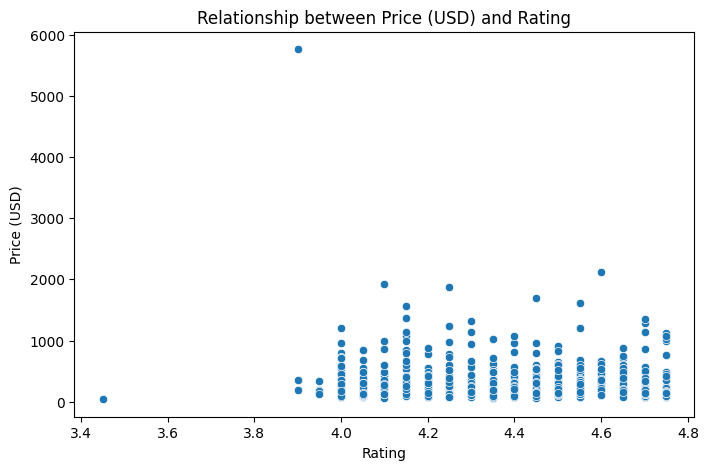

In [ ]:
#Scatterplot: Relationship between price_usd and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mobiles['rating'], y=mobiles['price_usd'])
plt.title('Relationship between Price (USD) and Rating')
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.show()

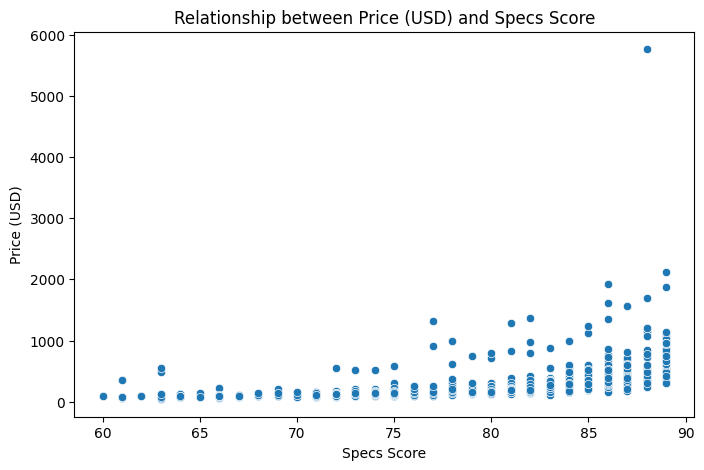

In [ ]:
# Scatterplot: Relationship between price_usd and specs_score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mobiles['specs_score'], y=mobiles['price_usd'])
plt.title('Relationship between Price (USD) and Specs Score')
plt.xlabel('Specs Score')
plt.ylabel('Price (USD)')
plt.show()


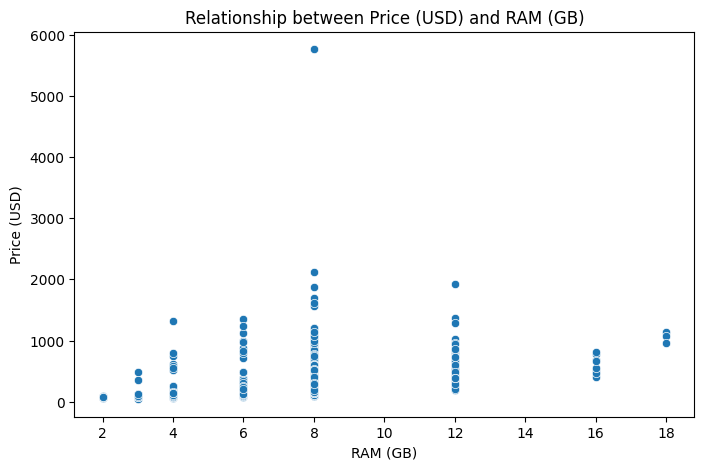

In [ ]:
# Scatterplot: Relationship between price_usd and ram_gb
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mobiles['ram_gb'], y=mobiles['price_usd'])
plt.title('Relationship between Price (USD) and RAM (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.show()


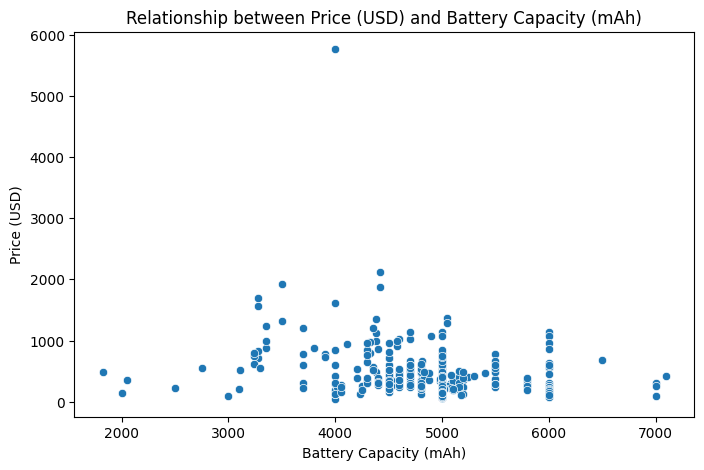

In [ ]:
# Scatterplot: Relationship between price_usd and battery_capacity_mah
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mobiles['battery_capacity_mah'], y=mobiles['price_usd'])
plt.title('Relationship between Price (USD) and Battery Capacity (mAh)')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price (USD)')
plt.show()


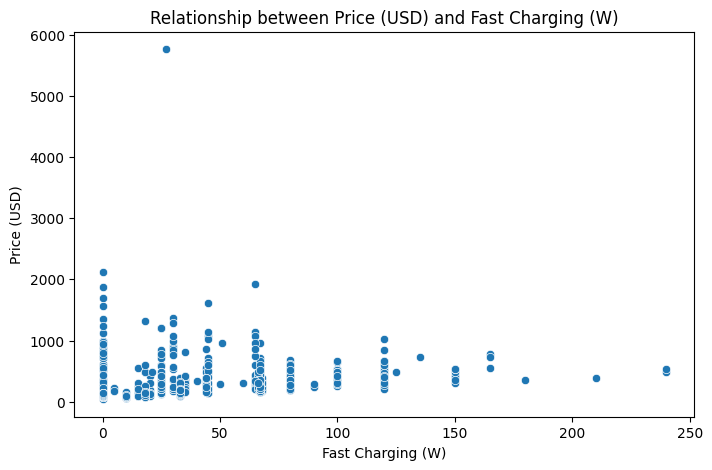

In [ ]:
# Scatterplot: Relationship between price_usd and fast_charging_w
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mobiles['fast_charging_w'], y=mobiles['price_usd'])
plt.title('Relationship between Price (USD) and Fast Charging (W)')
plt.xlabel('Fast Charging (W)')
plt.ylabel('Price (USD)')
plt.show()


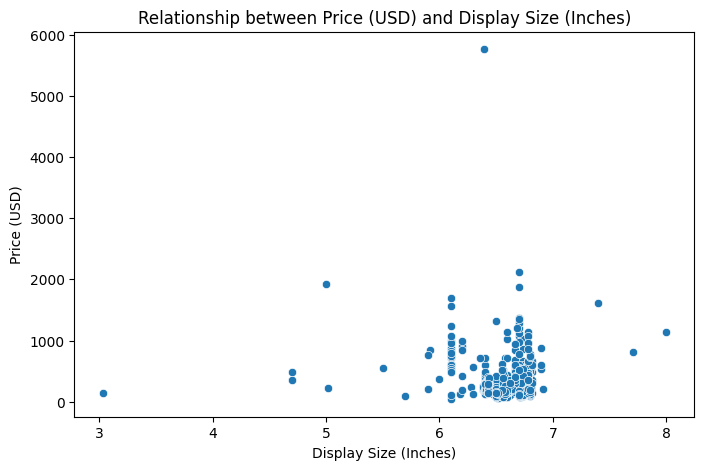

In [ ]:
# Scatterplot: Relationship between price_usd and display_size_inches
plt.figure(figsize=(8, 5))
sns.scatterplot(x=mobiles['display_size_inches'], y=mobiles['price_usd'])
plt.title('Relationship between Price (USD) and Display Size (Inches)')
plt.xlabel('Display Size (Inches)')
plt.ylabel('Price (USD)')
plt.show()


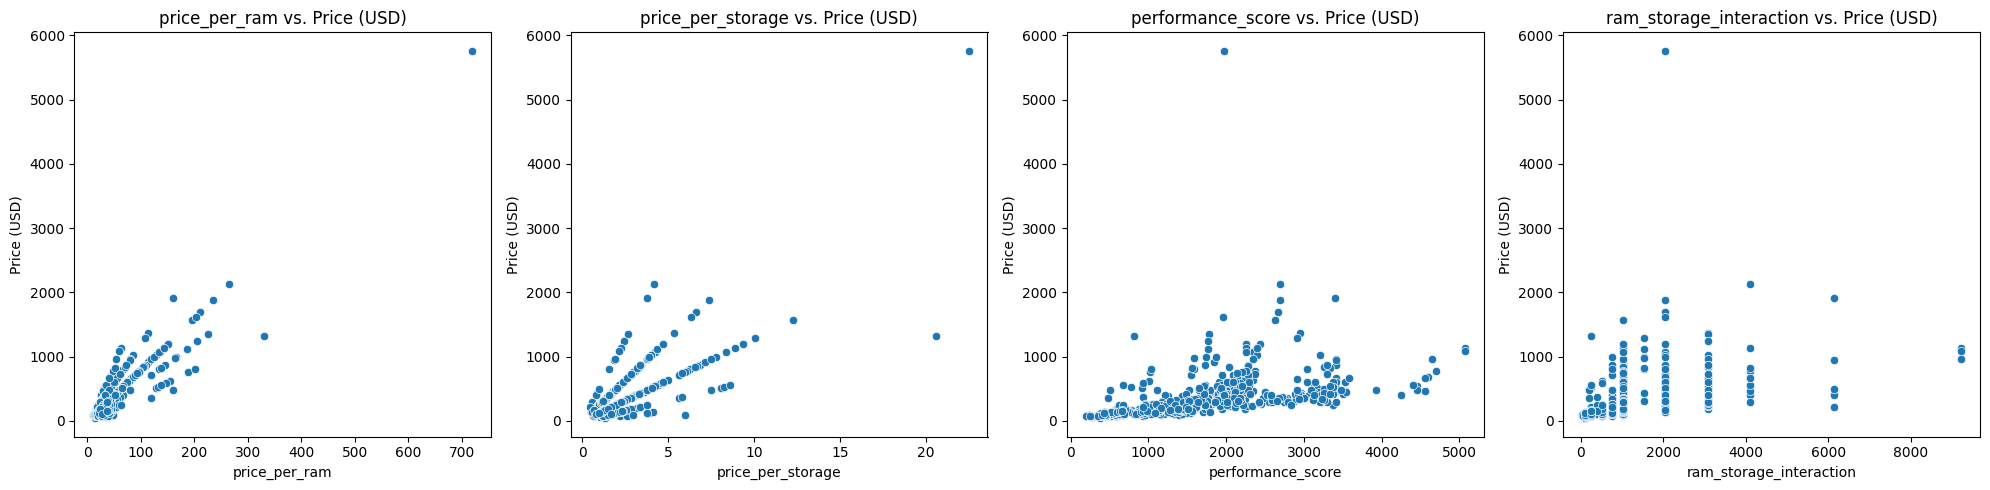

In [ ]:
# List of new features to visualize
new_features = ['price_per_ram', 'price_per_storage', 'performance_score', 'ram_storage_interaction']

# Create scatterplots arranged in a single row
fig, axes = plt.subplots(1, len(new_features), figsize=(20, 5))  # Adjust the figure size for clarity

for i, feature in enumerate(new_features):
    sns.scatterplot(ax=axes[i], x=mobiles[feature], y=mobiles['price_usd'])
    axes[i].set_title(f'{feature} vs. Price (USD)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price (USD)')

plt.tight_layout()
plt.show()


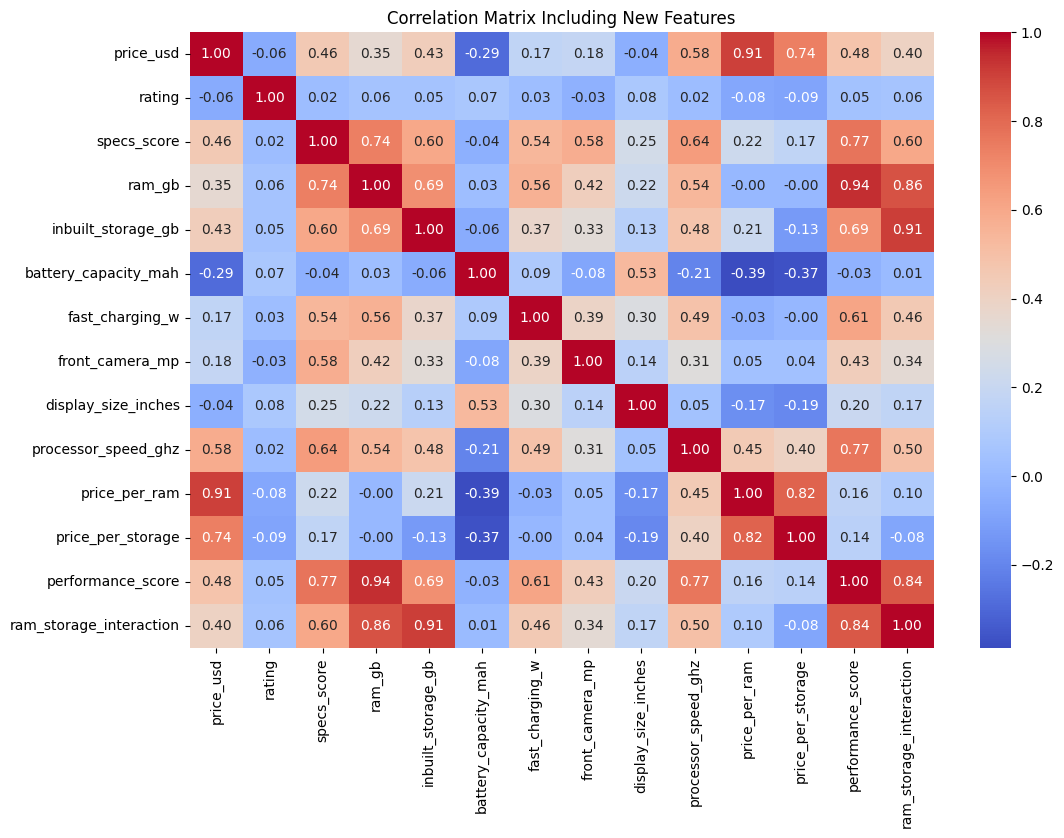

In [ ]:
numerical_features = ['price_usd', 'rating', 'specs_score', 'ram_gb',
                      'inbuilt_storage_gb', 'battery_capacity_mah',
                      'fast_charging_w', 'front_camera_mp',
                      'display_size_inches', 'processor_speed_ghz',
                      'price_per_ram', 'price_per_storage',
                      'performance_score', 'ram_storage_interaction']

correlation_matrix = mobiles[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including New Features')
plt.show()


# Machine Learning

# Random Forest Regressor:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
features = ['rating', 'specs_score', 'ram_gb', 'inbuilt_storage_gb',
            'battery_capacity_mah', 'fast_charging_w', 'front_camera_mp',
            'display_size_inches', 'processor_speed_ghz', 'price_per_ram',
            'price_per_storage', 'performance_score', 'ram_storage_interaction']

target = 'price_usd'

X = mobiles[features]
y = mobiles[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 1857.5325425157723
R² Score: 0.9716160408757754


In [ ]:
# Feature importance
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importance[indices], align="center")
plt.xticks(range(len(features)), np.array(features)[indices], rotation=45)
plt.title("Feature Importance")
plt.show()


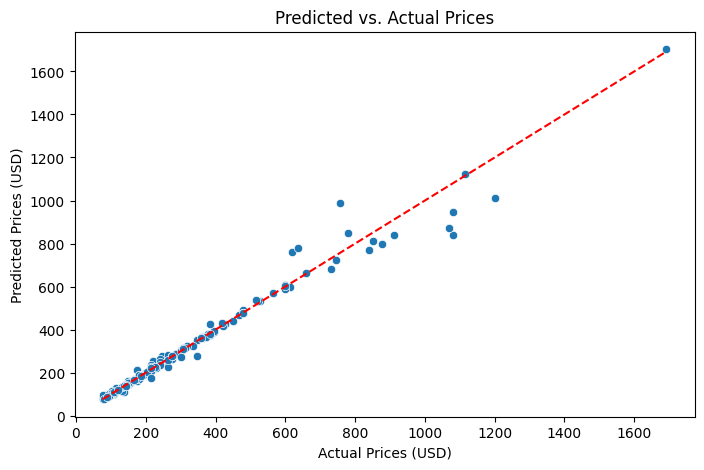

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs. Actual Prices")
plt.xlabel("Actual Prices (USD)")
plt.ylabel("Predicted Prices (USD)")
plt.show()


# K-Nearest Neighbors (KNN) and SVM:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

data_cleaned = mobiles.drop(columns=['mobile_name', 'os'])  # Remove non-numeric columns
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)  # Convert categorical columns to numeric

# Split into features (X) and target (y)
X = data_cleaned.drop(columns=['price_usd'])
y = data_cleaned['price_usd']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model
knn_model = KNeighborsRegressor(n_neighbors=5)


# Train the models
knn_model.fit(X_train_scaled, y_train)


# Make predictions
knn_predictions = knn_model.predict(X_test_scaled)


# Evaluate models using R-squared and Mean Squared Error
knn_r2 = r2_score(y_test, knn_predictions)


knn_mse = mean_squared_error(y_test, knn_predictions)


# Compile results
results = pd.DataFrame({
    'Model': ['KNN'],
    'R-squared': [knn_r2],
    'Mean Squared Error': [knn_mse]
})

print(results)


  Model  R-squared  Mean Squared Error
0   KNN   0.808314        12544.526751


# Gradient Boosting:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test_scaled)

# Evaluate the model using R-squared and Mean Squared Error
gb_r2 = r2_score(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Compile results
results = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'R-squared': [gb_r2],
    'Mean Squared Error': [gb_mse]
})

print(results)


               Model  R-squared  Mean Squared Error
0  Gradient Boosting   0.986702          870.292204


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize results list
results = []

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Iterate over models
for name, model in models.items():
    # Perform cross-validation (e.g., 5-fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores = -cv_scores  # Convert to positive values

    # Append statistical metrics for the model
    results.append({
        'Model': name,
        'Min': np.min(cv_scores),
        'First_Qu': np.percentile(cv_scores, 25),
        'Median': np.median(cv_scores),
        'Mean': np.mean(cv_scores),
        'Third_Qu': np.percentile(cv_scores, 75),
        'Max': np.max(cv_scores)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


               Model           Min      First_Qu        Median          Mean  \
0      Random Forest   2956.594235   3835.569326   6083.172388  35079.738000   
1                KNN  21972.071598  31169.111465  48498.350806  77149.479104   
2  Gradient Boosting   1354.190504   2381.199350   4565.743382  32141.571397   

       Third_Qu            Max  
0  11484.204623  151039.149430  
1  66478.968569  217628.893084  
2   7113.858794  145292.864954  
